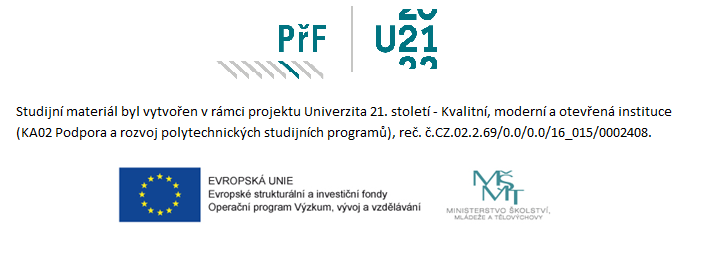

#Metoda podpůrných vektorů - SVM
Support vector machines (SVM) je jednou z klasických metod strojového učení. Dále rozšiřuje myšlenku lineárních klasifikátorů o pojem hranice. Je použitelná a účinná i pro úlohy, které nejsou lineárně separabilní. V porovnání s neuronovými sítěmi je i méně výpočetně náročná. Ukážeme si základní myšlenky na kterých stojí.

## Hard margin formulace
Nejprve předpokládejme, že máme data, která jsou lineárně separabilní. Tedy opět $x_i$ jsou datové body a $y_i$ jsou příslušející labely, $y_i=\pm1$. Na obrázku níže, je zachycena situace, kdy se snažíme separovat jednotlivé body rovinou $w^T\cdot x + b=0$, podobně jako v případě lineárních klasifikátorů. Rozdíl je ovšem ten, že nyní se snažíme maximálně rozšířit pás, ve kterém neleží žádné body v příznakovém prostoru. **Rozmyslete si**, jaký to má vliv na počet takovýchto rovin v porovnání s perceptronem. Body, které leží na hranicích tohoto pásu, nazýváme *podpůrné vektory*, odtud název metody. O hard margin (*pevném okraji*) mluvíme proto, že nepřipouštíme situaci, že by body byly na opačné straně hraničních přímek.


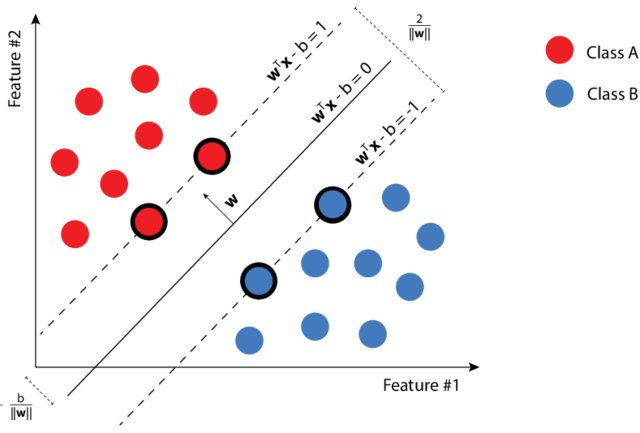

Zdroj obrázku [https://www.researchgate.net/publication/332402217_Analyzing_l1-loss_and_l2-loss_Support_Vector_Machines_Implemented_in_PERMON_Toolbox/figures?lo=1](https://www.researchgate.net/publication/332402217_Analyzing_l1-loss_and_l2-loss_Support_Vector_Machines_Implemented_in_PERMON_Toolbox/figures?lo=1)

###Matematická formulace

Šířka pásu $d$ je dána vahami $w$ a to tak, že $d=\frac{2}{||w||}$, viz [zde](https://www.csd.uwo.ca/~xling/cs860/papers/SVM_Explained.pdf). Protože chceme mít pás maximální šířky, můžeme úlohu formulovat tak, že **minimalizujeme** funkci $\frac{||w||^2}{2}$, tedy používáme místo maximalizace minimalizaci převrácené hodnoty. Druhá mocnina v čitateli je zde ze stejného důvodu jako u MNČ, tedy zbavíme se odmocniny v definici normy. Je nutné si uvědomit, že navíc chceme, aby body ležely nad, resp. pod rovinou, tedy aby pro $y_i=+1$ platilo $w^T\cdot x_i +b\ge+1$ a pro $y_i=-1$ platilo, že $w^T\cdot x_i +b\le-1$. Obě tyto podmínky lze zapsat ve tvaru $y_i(w^T\cdot x_i +b)-1\ge0$.

Toto vede na tzv. úlohu [kvadratického programování](https://cs.wikipedia.org/wiki/Kvadratick%C3%A9_programov%C3%A1n%C3%AD):
\begin{align}
&\min \frac{||w||^2}{2} \\
\mbox{za podmínek}\\
&y_i(w^T\cdot x_i +b)-1\ge0,
\end{align}
kde neznámé jsou $w$ a $b$. Pro praktické použití se spíše využívá duální formulace této úlohy, více viz [zde](https://www.csd.uwo.ca/~xling/cs860/papers/SVM_Explained.pdf), což je maximalizační úloha pro duální proměnné $\alpha_i$.

\begin{align}
&\max \sum_i\alpha_i- \frac{1}{2}\sum_{i,j}\alpha_i\alpha_j y_i  x_i \cdot x_j y_j \\
\mbox{za podmínek}\\
&\sum_i \alpha_iy_i=0\\
&\alpha_i\ge0.\\
\end{align}

Z duálních proměnných je možné dopočítat $w$ a $b$, viz [zde](https://www.csd.uwo.ca/~xling/cs860/papers/SVM_Explained.pdf), například  váhy spočteme dle vztahu $w=\sum_i\alpha_i y_i x_i$ .

Máme-li určené váhy $w$ a $b$, pak klasifikaci provádíme podobně jako u lineárního klasifikátoru:
\begin{equation}
\hat{y}=\text{sign}(w^T \cdot x + b),
\end{equation}
nebo v případě duální formulace máme vztah:
\begin{equation}
\hat{y}=\text{sign}(\sum_i\alpha_i y_i x_i \cdot x + b).
\end{equation}

**Poznámka I**

Pokud si kladete otázku, proč se volí rovnoběžné roviny na hladině $\pm 1$, tak je to v podstatě jedno na jaké hladině se volí. Vektor $w$ má vliv na sklon roviny a jeho vynásobení libovolnou nenulovou konstantou na naklonění roviny nemá vliv. Proto se bere hladina $\pm 1$.

**Poznámka II**

Úlohy kvadratického programování je možné popsat pomocí matic, které se vyskytují jak v minimalizované funkci, tak v soustavě omezujících podmínek. Například účelovou funkci $\frac{||w||^2}{2}$ lze zapsat ve tvaru $\frac{1}{2}w^T I w$, kde $I$ je jednotková matice.


**Poznámka III**

Duální formulace je výhodná jak z výpočetního hlediska, tak proto, že umožní udělat tzv. *jádrový trik*, viz dále, což je efektivní způsob nelineární transformace úlohy do vyšší dimenze proto, aby šla data lépe separovat.




#### Úkol pro samostatnou činnost
Seznamte se s knihovnou [CVXOPT](https://cvxopt.org/), hlavně se zadáváním úlohy [kvadratického programování](https://cvxopt.org/userguide/coneprog.html#quadratic-programming).

Naivní implementace primární formulace této metody *from scratch* pomocí řešiče kvadratického programování [CVXOPT](https://cvxopt.org/) je uvedena níže. Porovnejte s matematickým modelem. Konkrétně si rozmyslete, jak je úloha formulována v maticovém zápisu. Většina kódu pak spočívá jen ve vygenerování příslušných matic popisujících úlohu kvadratického programování, metoda *create_model_SVM_primary()* a jejich předání řešiči.

In [ ]:
!pip install cvxopt # instalace knihovny pokuď neexistuje

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


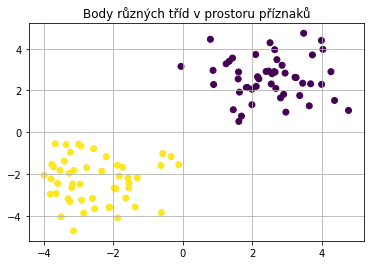

In [ ]:
# generování bodů
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
dim = 2 # dimenze ulohy
samples = 100
X, y = make_blobs(n_samples=samples, n_features=dim, centers=[(2.5,2.5),(-2.5,-2.5)], random_state=0)
y[y==0] = -1 # udelej tridy -1/1
plt.scatter(X[:,0],X[:,1], c = y)
plt.grid()
plt.title("Body různých tříd v prostoru příznaků")
plt.show()

In [ ]:
import cvxopt
from cvxopt import matrix, solvers
import numpy as np
# zde je nutno rozumět CVXOPT - jedná se jen o vygenerování matic pro problém QP
def create_model_SVM_primary(X,y):
  n,dim=X.shape #zjisti si rozmery
  print(dim)
  # generovani matic a vektoru pro ucelovou funkci
  # generovani matice P - pro resic vstupuje jako matice prislusne kvadraticke formy
  P = np.identity(dim+1) # toto je tedy matice pro ucelovou funkci I
  P[dim,dim]=0 # eliminuj koeficient pro b
  # generovani vektoru q - vektor s koeficienty pro linearni cast ucelove funkce
  q = np.zeros(dim+1) # neni zde linearni clen v ucelove funkci, tedy 0
  # generovani omezujicich podminek
  h = -1*np.ones((n,1))
  G = np.ones((n, dim+1))
  for i,(x,y) in enumerate(zip(X,y)):
    G[i,:dim] = -y*x # sloupce odpovidajici w
    G[i,dim] = -y  # sloupec odpovidajici b
  return matrix(P), matrix(q), matrix(G), matrix(h)
# volani metody pro vygenerovani prislusnych matic
P, q, G, h = create_model_SVM_primary(X,y)
sol = solvers.qp(P, q, G, h) # zavolani resice
w = sol['x']
print(w)

2
     pcost       dcost       gap    pres   dres
 0:  3.4433e-02  1.9256e+01  3e+02  2e+00  5e+02
 1:  2.6100e-01 -2.7233e+01  4e+01  3e-01  8e+01
 2:  3.5849e-01 -1.3024e+00  2e+00  1e-02  4e+00
 3:  3.2889e-01  2.3703e-01  9e-02  1e-04  3e-02
 4:  3.0276e-01  2.9302e-01  1e-02  1e-05  3e-03
 5:  3.0168e-01  3.0153e-01  1e-04  1e-07  4e-05
 6:  3.0166e-01  3.0166e-01  1e-06  1e-09  4e-07
 7:  3.0166e-01  3.0166e-01  1e-08  1e-11  4e-09
Optimal solution found.
[-5.88e-01]
[-5.08e-01]
[ 2.11e-01]



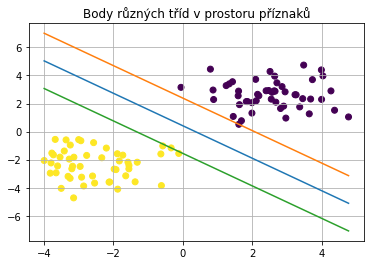

In [ ]:
# vizualizace výsledků
left = np.min(X, axis = 0)
right = np.max(X, axis = 0)
xgr = np.linspace(left[0], right[0],100)
ygr = -(w[0]*xgr + w[2])/w[1]
ygr_p1 = -(w[0]*xgr + w[2]+1)/w[1]
ygr_m1 = -(w[0]*xgr + w[2]-1)/w[1]
plt.scatter(X[:,0],X[:,1], c = y)
plt.plot(xgr,ygr)
plt.plot(xgr,ygr_p1, label = "+1")
plt.plot(xgr,ygr_m1, label = "-1")
plt.grid()
plt.title("Body různých tříd v prostoru příznaků")
plt.show()

## Soft margin formulace

Výše uvedená formulace nepřipouští to, že nějaký bod nebude klasifikován správně. Základní myšlenka rozšíření je taková, že dovolíme bodům aby se nacházely pod danou hranicí, viz obrázek níže. Hodnotu o kterou se může *i-*tý bod nacházet pod příslušnou hranicí označíme $\xi_i$, kde $\xi_i \ge 0$.

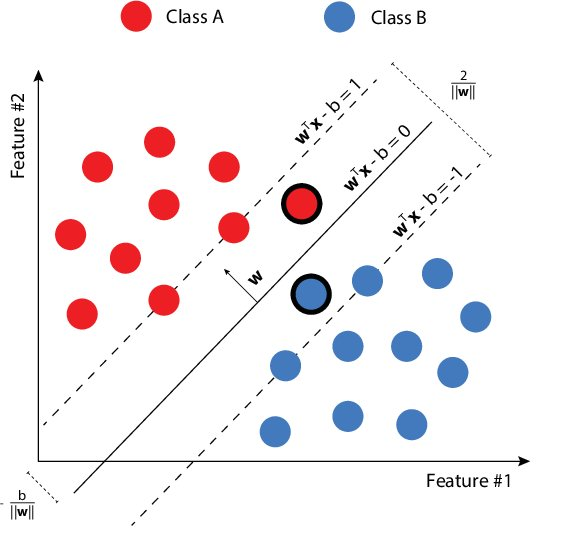

Zdroj obrázku [https://www.researchgate.net/publication/332402217_Analyzing_l1-loss_and_l2-loss_Support_Vector_Machines_Implemented_in_PERMON_Toolbox/figures?lo=1](https://www.researchgate.net/publication/332402217_Analyzing_l1-loss_and_l2-loss_Support_Vector_Machines_Implemented_in_PERMON_Toolbox/figures?lo=1)

### Matematická formulace

Vyjdeme z výše uvedené myšlenky porušení podmínky, že bod je nad příslušnou hranicí. Nyní může být i pod okrajem s posunem $\xi_i$, což se projeví na omezujících podmínkách. Pro labely s hodnotou  $y_i=+1$ chceme, aby platilo $w^T⋅x_i+b≥+1-\xi_i$ a pro $y_i=−1$ platilo, že $w^T⋅x_i+b≤−1+\xi_i$. Toto lze opět zapsat ve tvaru $y_i(w^T\cdot x_i +b)-1+\xi_i\ge0$.

Samozřejmě chceme, aby dílčí chyby $\xi_i$, kterých se algoritmus dopustí, byly co nejmenší, z tohoto důvodu přidáme do kriteriální funkce penalizační člen a dostáváme:
\begin{align}
&\min \frac{||w||^2}{2} + c \sum_i \xi_i \\
\mbox{za podmínek}\\
&y_i(w^T\cdot x_i +b)-1+\xi_i\ge0,
\end{align}
kde neznámé jsou $w$, $b$ a $\xi_i$, $c$ je konstanta vlivu penalizace, tedy tzv. *hyperparametr* modelu. Opět je možné provést duální formulaci této úlohy, více viz [zde](https://www.csd.uwo.ca/~xling/cs860/papers/SVM_Explained.pdf).

Na následující ukázce kódu je opět implementace metody *SVM* v soft margin formulaci pomocí nástroje *CVXOPT*.

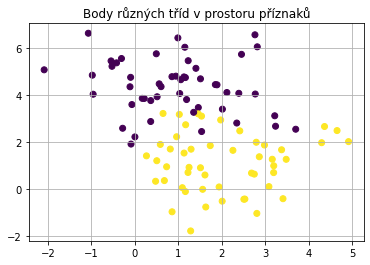

In [ ]:
dim = 2 # dimenze ulohy
samples = 100
X, y = make_blobs(n_samples=samples, centers=2, random_state=0, cluster_std=1.2)
y[y==0] = -1 # udelej tridy -1/1
plt.scatter(X[:,0],X[:,1], c = y)
plt.grid()
plt.title("Body různých tříd v prostoru příznaků")
plt.show()

P:(103, 103)
q:(103,)
G:(200, 103)
h:(200, 1)
     pcost       dcost       gap    pres   dres
 0: -8.2993e+11  3.6782e+11  1e+12  2e+05  6e+00
 1:  6.9779e+09 -3.1797e+10  2e+11  2e+04  5e-01
 2:  9.8008e+09 -1.5345e+09  2e+10  1e+03  4e-02
 3:  4.6482e+08  1.5205e+05  6e+08  1e+01  5e-04
 4:  1.0806e+07  1.3024e+06  1e+07  3e-01  9e-06
 5:  3.1974e+06  1.4625e+06  2e+06  4e-02  1e-06
 6:  3.2558e+06  1.6012e+06  2e+06  4e-02  1e-06
 7:  3.1768e+06  1.7141e+06  2e+06  3e-02  8e-07
 8:  2.9620e+06  1.7874e+06  1e+06  2e-02  6e-07
 9:  2.5445e+06  1.8774e+06  7e+05  5e-03  2e-07
10:  2.4164e+06  1.9316e+06  5e+05  3e-03  9e-08
11:  2.3289e+06  2.0240e+06  3e+05  1e-03  4e-08
12:  2.2487e+06  2.0563e+06  2e+05  4e-04  1e-08
13:  2.1899e+06  2.1082e+06  8e+04  6e-16  4e-14
14:  2.1627e+06  2.1262e+06  4e+04  8e-16  5e-14
15:  2.1449e+06  2.1393e+06  6e+03  6e-16  2e-14
16:  2.1419e+06  2.1418e+06  2e+02  7e-16  2e-14
17:  2.1419e+06  2.1419e+06  2e+00  7e-16  5e-14
Optimal solution found.


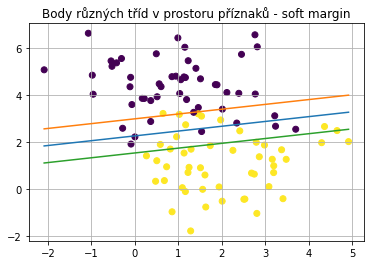

In [ ]:
def create_model_SVM_softm_primary(X, y, C=1):
  n,dim=X.shape #zjisti si rozmery
  # generovani matic a vektoru pro ucelovou funkci
  # generovani matice P - pro resic vstupuje jako matice prislusne kvadraticke formy
  P = np.zeros((dim+1+n,dim+1+n))
  for i in range(0, dim):
    P[i,i]=1 # prepis 1 na diagonalu pro hodnoty w
  # generovani vektoru q - vektor s koeficienty pro linearni cast ucelove funkce
  q = C*np.ones(dim+1+n) # linearni clen v ucelove funkci soucet ksi
  q[:dim+1] = 0 #nastav na nulu pozice w a b ve vektoru q

  # generovani omezujicich podminek
  h = np.concatenate((-1*np.ones((n,1)), np.zeros((n,1))))

  G = np.zeros((2*n, n+dim+1))
  for i,(x,y) in enumerate(zip(X,y)):
    G[i,:dim] = -y*x # sloupce odpovidajici w
    G[i,dim] = -y  # sloupec odpovidajici b
    G[i,dim+1+i] = -1
    G[i+n,dim+1+i] = -1
  print(f"P:{P.shape}")
  print(f"q:{q.shape}")
  print(f"G:{G.shape}")
  print(f"h:{h.shape}")
  return matrix(P), matrix(q), matrix(G), matrix(h)
# vygeneruj si matice modelu
P, q, G, h = create_model_SVM_softm_primary(X,y, C = 10)
# volej rešič
sol = solvers.qp(P, q, G, h)
w = sol['x']
#vizualizace výsledků
left = np.min(X, axis = 0)
right = np.max(X, axis = 0)
xgr = np.linspace(left[0], right[0],100)
ygr = -(w[0]*xgr + w[2])/w[1]
ygr_p1 = -(w[0]*xgr + w[2]+1)/w[1]
ygr_m1 = -(w[0]*xgr + w[2]-1)/w[1]
plt.scatter(X[:,0],X[:,1], c = y)
plt.plot(xgr,ygr)
plt.plot(xgr,ygr_p1, label = "+1")
plt.plot(xgr,ygr_m1, label = "-1")
plt.grid()
plt.title("Body různých tříd v prostoru příznaků - soft margin")
plt.show()

####Úkoly pro samostatnou práci


1.   Ověřte vliv konstanty $c$ na počet správně klasifikovaných bodů. Proveďte volbu $c$ pro různé řády (obvykle se zjišťuje vliv tohoto hyperparametru přes několik řádů).
2.   Prostudujte si formulaci **SVM pro regresi** [zde](https://www.csd.uwo.ca/~xling/cs860/papers/SVM_Explained.pdf) a proveďte její implementaci v CVXOPT.
3.   Porovnejte regresní model z bodu 2 s regresí pomocí MNČ, můžete použít třeba implementaci *OLS* z [statsmodels](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html), nebo vlastní, viz druhý sheet. Použijte data v následující buňce. Zvažte vliv odlehlých hodnot na výslednou přímku.



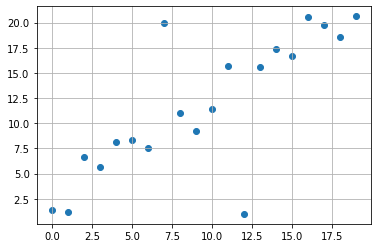

In [ ]:
import random
x = [ i for i in range(20)]
y = [ i+5*random.random() for i in x]
y[7] = 20
y[12] = 1
plt.scatter(x,y)
plt.grid()


## Jádrová transformace - kernelizace

Již několikrát jsme se setkali s tím, že data v prostoru nižší dimenze nemusí být lineárně separovatelná, ale při vhodné nelineární transformaci $\phi$ do prostoru vyšší dimenze je lze oddělit, viz níže.

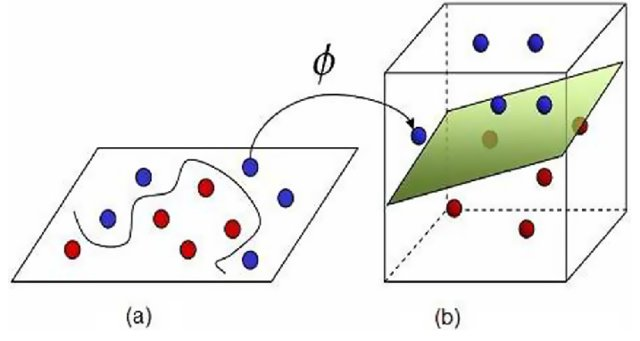

Zdroj obrázku [https://www.researchgate.net/publication/281412932_Music_emotion_recognition_The_combined_evidence_of_MFCC_and_residual_phase/figures?lo=1](https://www.researchgate.net/publication/281412932_Music_emotion_recognition_The_combined_evidence_of_MFCC_and_residual_phase/figures?lo=1)

Transformace do prostoru vyšší dimenze se neprovádí explicitně, tedy tak, že bychom transformovali každý vzor zvlášť, a pak provedli SVM, ale používá se tzv. *jádrového triku*. Trik spočívá v tom, že
stačí pouze drobně upravit duální formulaci modelu SVM a máme v ní již obsaženou nelineární transformaci.

**Poznámka**
Pokud bychom transformovali body nejprve do prostoru vyšší dimenze a pak provedli SVM, tak by to bylo výpočetně náročnější.

Pro názornost uvažujme duální formulaci pro hard margin úlohu:

\begin{align}
&\max \sum_i\alpha_i- \frac{1}{2}\sum_{i,j}\alpha_i\alpha_j y_i  x_i \cdot x_j y_j \\
\mbox{za podmínek}\\
&\sum_i \alpha_iy_i=0\\
&\alpha_i\ge0.\\
\end{align}

A klasifikace je dána:
 \begin{equation}
\hat{y_j}=\text{sign}(\sum_i\alpha_i y_i x_i \cdot x_j + b).
\end{equation}

Všimněme si skalárního součinu $x_i \cdot x_j$ jak v účelové funkci, tak i ve vlastní klasifikaci. Pro transformaci do prostoru vyšší dimenze by se zde objevilo $\phi(x_i) \cdot \phi(x_j)$. Jádrový trik spočívá v nahrazení tohoto součinu pomocí tzv. *jádra* $k(x_i,x_j)$, s vlastností $k(x_i,x_j)=\phi(x_i) \cdot \phi(x_j)$. Nemusí se tak provádět přepočet do vyšší dimenze, pouze stačí upravit fomulaci na
\begin{align}
&\max \sum_i\alpha_i- \frac{1}{2}\sum_{i,j}\alpha_i\alpha_j y_i  k(x_i, x_j) y_j \\
\mbox{za podmínek}\\
&\sum_i \alpha_iy_i=0\\
&\alpha_i\ge0,\\
\end{align}
a pro klasifikaci:
 \begin{equation}
\hat{y_j}=\text{sign}(\sum_i\alpha_i y_i k(x_i, x_j) + b),
\end{equation}
což je efektivnější.

### Příklady jader

Konkrétní příklady jader:


*   *Lineární jádro*: $k(x_i, x_j) = x_i \cdot x_j$ - původní formulace
*   *Polynomiální jádro*: $k(x_i, x_j) = (x_i \cdot x_j +a)^b$
*   *RBF* (Radial Basis Function): $k(x_i, x_j) = e^{-\frac{(||x_i-x_j||^2)}{2\sigma^2}}$
*   *Jádro typu tanh*: $k(x_i, x_j) = \tanh(a x_i \cdot x_j +b)$

Přehled některých jader je podán [zde](http://crsouza.com/2010/03/17/kernel-functions-for-machine-learning-applications/#kernel_methods).





# SVM v knihovně SKLEARN

V knihovně [sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm) je metoda SVM implementována dvoukolejně. Existuje zde implementace [svc](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), která umožňuje provádět jádrové transformace a pro případ klasifikace do více tříd implementuje metodu *one-to-one*, což ji činí výpočetně náročnou. Dle dokumentace je založená i na jiné optimalizační knihovně a tedy algoritmu pro řešení úloh kvadratického programování, konkrétně [SMO](https://en.wikipedia.org/wiki/Sequential_minimal_optimization). Druhá model [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) se odlišuje hlavně použitím pouze lineárního jádra, jinou optimalizační knihovnou a též i algoritmem pro klasifikaci do výše tříd *one-vs-rest*, což ji činí v dokumentaci doporučovanou pro velké datasety.

V této knihovně ja zároveň implementováno použití metody SVM pro regresi [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR) a [LinearSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR). Rozdíly jsou podobné jako v případě klasifikace.

####Úkoly pro samostatnou práci



1.   Projděte si [následující příklady](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py) pro regresi pomocí *SVR*. Věnujte pozornost vlivu jader.
2.   Projděte si příklady [zde](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py) a prostudujte si vliv použití různých jader a jejich parametrů na klasifikaci.
3.    Dále si projděte tento [příklad](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py) věnovaný vlivu parametrů *RBF jádra*. Povšimněte si použití algoritmu [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) pro nalezení optimálních hyperparametrů.



# Literatura:
1) [Blog](https://sebastianraschka.com/blog/2021/ml-course.html) autora knihy [Python Machine Learning, 3rd Edition](https://sebastianraschka.com/books/#python-machine-learning-3rd-edition):

RASCHKA, Sebastian a Vahid MIRJALILI. Python machine learning: machine learning
and deep learning with Python, scikit-learn, and TensorFlow. Birmingham: Pack pub-
lishing, 2017. ISBN 978-1-78712-593-3.

2)  Pro čtenáře s hlubším zájmem je k dispozici sbírka výukových materiálů ke knize [An Introduction to Statistical Learning](https://www.statlearning.com/) včetně
knihy samotné:

JAMES, Gareth, Daniela WITTEN, Trevor HASTIE a Robert TIBSHIRANI. An introduction to statistical learning: with applications in R. New York: Springer, [2013]. Springer texts in statistics, 103. ISBN 978-1461471370.
